In [59]:
import camelot as cm

In [83]:
input_pdf = cm.read_pdf('india_factsheet_economic_n_hdi.pdf', flavor='lattice', pages='1,2')

In [84]:
input_pdf

<TableList n=4>

In [85]:
for n in input_pdf:
    print(n)
    

<Table shape=(4, 3)>
<Table shape=(15, 3)>
<Table shape=(14, 4)>
<Table shape=(13, 3)>


In [86]:
input_pdf[2].df

,0,1,2,3
0,Human Development Indicators,,2000,2011
1,13,Human Development Index Value (HDI),0.461,0.547
2,14,HDI Rank (out of 187),,134
3,15,Inequality Adjusted Human Development Index Value,,0.392
4,16,Loss in HDI due to Inequalities (%),,28.7
5,,,2001,2011
6,17,Gender Inequality Index (GII),0.5531,0.617
7,18,GII Rank (out of 146),,129
8,,,1996,2006
9,19,Gender Empowerment Measure (GEM),0.416,0.497


In [87]:
df = input_pdf[2].df.loc[11:14,1:3]

In [88]:
df

,1,2,3
11,Literacy Rate (%),64.8,74.04
12,Male Literacy Rate (%),75.3,82.14
13,Female Literacy Rate (%),53.7,65.46


In [89]:
df = df.reset_index(drop = True)

In [90]:
df

,1,2,3
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [91]:
df.columns = ["KPI", "2001", "2011"]

In [92]:
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [112]:
df.loc[:,["2001", "2011"]] = df.loc[:,["2001", "2011"]].astype(float)

In [113]:
df.to_csv("table_from_pdf.csv")

In [114]:
! ls

 141549.mp4			      newsScrapNoCred.py   tedTalkDownload.py
'Extacted data from pdf.ipynb'	      requirements.txt	   uvenv
 india_factsheet_economic_n_hdi.pdf   table_from_pdf.csv   venv


In [115]:
import pandas as pd

In [116]:
df2 = pd.read_csv("table_from_pdf.csv")

In [117]:
df2

,Unnamed: 0,KPI,2001,2011
0,0,Literacy Rate (%),64.8,74.04
1,1,Male Literacy Rate (%),75.3,82.14
2,2,Female Literacy Rate (%),53.7,65.46


In [118]:
import seaborn as sns

In [119]:
df_melted = df.melt("KPI", var_name='year', value_name='percentage')

In [120]:
df_melted

,KPI,year,percentage
0,Literacy Rate (%),2001,64.8
1,Male Literacy Rate (%),2001,75.3
2,Female Literacy Rate (%),2001,53.7
3,Literacy Rate (%),2011,74.04
4,Male Literacy Rate (%),2011,82.14
5,Female Literacy Rate (%),2011,65.46


In [121]:
type(df_melted.KPI[0])

str

<AxesSubplot:xlabel='KPI', ylabel='percentage'>

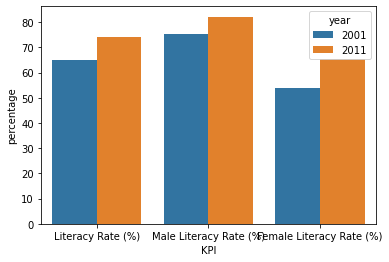

In [122]:
sns.barplot(x = 'KPI', y = 'percentage', hue = 'year', data=df_melted)